# K-Means Clustering

In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import math
from sklearn.decomposition import PCA

In [2]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
# Importing the dataset
df = pd.read_csv('xclara.csv')
shape = df.shape
print('shape: ' , shape)
df.head(5)

shape:  (3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


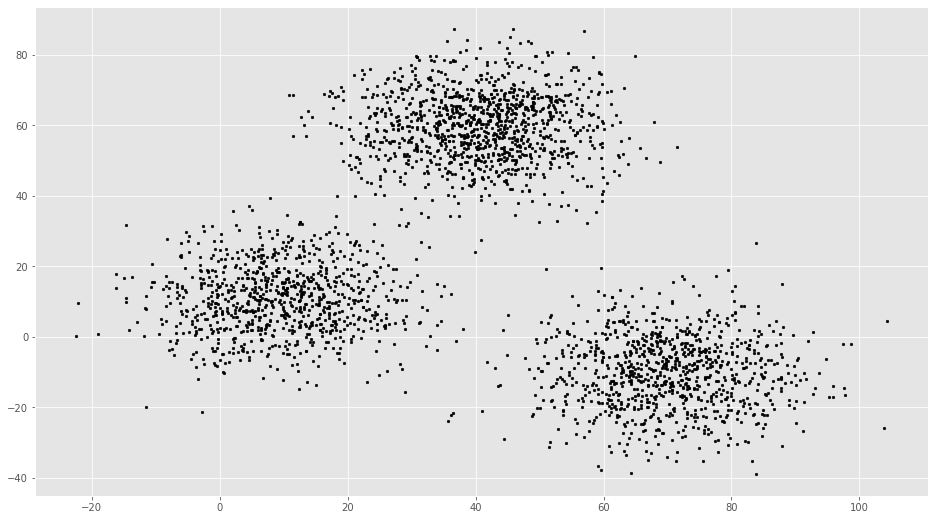

In [4]:
# Extract features
f1 = df['V1']
f2 = df['V2']
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [5]:
# Euclidean Distance
def dist(a, b, ax=1):
    return math.sqrt((a[0]-b[0])*(a[0]-b[0]) + (a[1]-b[1])*(a[1]-b[1]))

In [6]:
df.loc[[1,2,3]]['V1'].tolist()

[17.93671, 1.083576, 11.12067]

Generate k random centroids for x and y corrdinates with range of values 0-maximum value in dataset.

rows  [1793, 1411, 51]
Initial Centroids
[[32.97436 69.77639]
 [29.58027 51.32616]
 [10.7768  15.5336 ]]


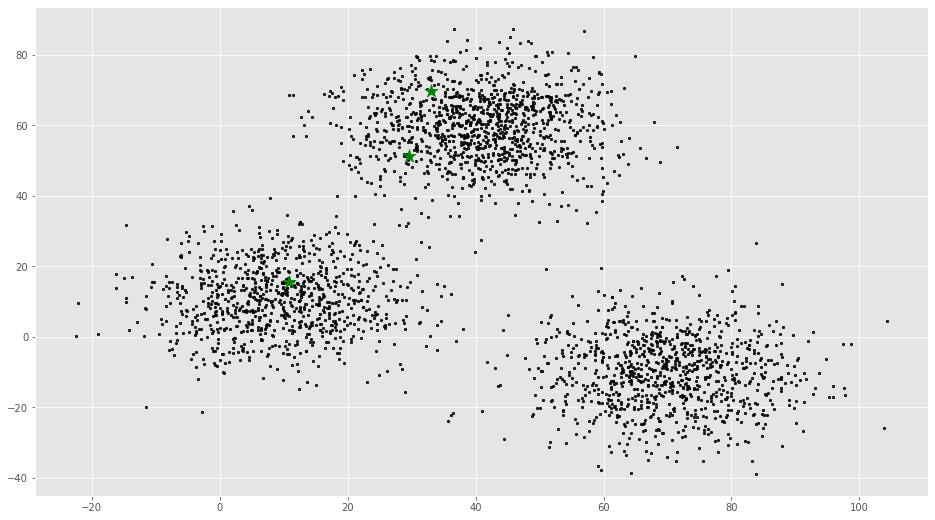

In [7]:
# Number of clusters
k=3
# X coordinates of random centroids
row_indexes = random.sample(range(shape[0]), k)
print('rows ', row_indexes)
C_x = df.loc[row_indexes]['V1'].tolist()
# Y coordinates of random centroids
C_y = df.loc[row_indexes]['V2'].tolist()
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [8]:
C_old = C.copy() # C_old will store the value of centroids when it updates

clusters = [] # Cluster labels

def assign_labels(data, C):
    clusters = []
    for index, row in data.iterrows():
        min_centroid_index = 0
        min_centroid_distance = dist((row['V1'], row['V2']), C[0])
        
        for i in range(len(C)):
            centroid_distance = dist((row['V1'], row['V2']), C[i])
            if min_centroid_distance > centroid_distance:
                min_centroid_index = i
                min_centroid_distance = centroid_distance
        clusters.append(min_centroid_index)
        
    return clusters
    
clusters = assign_labels(df, C)
C_old

array([[32.97436, 69.77639],
       [29.58027, 51.32616],
       [10.7768 , 15.5336 ]], dtype=float32)

In [9]:
def get_means(clusters, label, data):
        indices = [i for i, x in enumerate(clusters) if x == label]
        
        row_x = df.loc[indices]['V1'].tolist()
        row_y = df.loc[indices]['V2'].tolist()
        
        new_x = sum(row_x)/len(indices)
        new_y = sum(row_y)/len(indices)
        
        return (new_x, new_y)
        
for index in range(k):
    C[index] = get_means(clusters, index, df)
    
C

array([[41.785248 , 66.89893  ],
       [43.31106  , 46.923428 ],
       [39.300835 , -0.3603471]], dtype=float32)

In [10]:
# Distance between new centroids and old centroids
def calculate_errors(c_old, c_new, k):
    errors = 0
    for index in range(k):
        if c_old[index][0] != c_new[index][0] and c_old[index][1] != c_new[index][1]:
            errors += 1     
    return errors
        
error = calculate_errors(C_old, C, k)
error

3

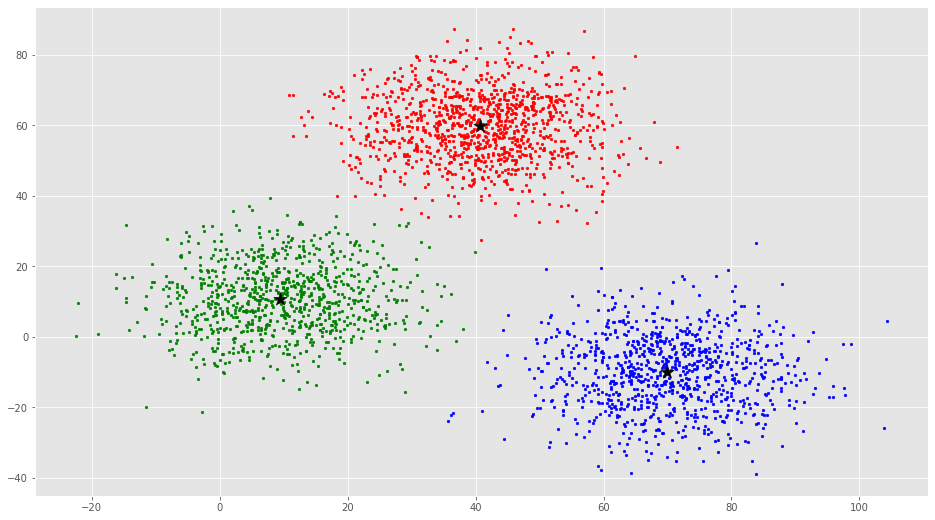

In [11]:
# Loop will run till the error becomes zero
while error != 0:
    clusters = assign_labels(df, C) # Assign each value to its closest cluster

    C_old = C.copy() # Store the old centroid values
    
    # Find the new centroids by taking the average value
    for index in range(k):
        C[index] = get_means(clusters, index, df)
        
    error = calculate_errors(C_old, C, k)

    
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')